In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_covtype
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings("ignore")

In [3]:
dataset = fetch_covtype()
x = pd.DataFrame(dataset.data,columns=dataset.feature_names)        
y = pd.Series(dataset.target,name="Covertype")     
x

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_30,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39
0,2596.0,51.0,3.0,258.0,0.0,510.0,221.0,232.0,148.0,6279.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2590.0,56.0,2.0,212.0,-6.0,390.0,220.0,235.0,151.0,6225.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2804.0,139.0,9.0,268.0,65.0,3180.0,234.0,238.0,135.0,6121.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2785.0,155.0,18.0,242.0,118.0,3090.0,238.0,238.0,122.0,6211.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2595.0,45.0,2.0,153.0,-1.0,391.0,220.0,234.0,150.0,6172.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396.0,153.0,20.0,85.0,17.0,108.0,240.0,237.0,118.0,837.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581008,2391.0,152.0,19.0,67.0,12.0,95.0,240.0,237.0,119.0,845.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581009,2386.0,159.0,17.0,60.0,7.0,90.0,236.0,241.0,130.0,854.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581010,2384.0,170.0,15.0,60.0,5.0,90.0,230.0,245.0,143.0,864.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
print("Shape",x.shape)
print("Target Distribution",y.value_counts().sort_index())

Shape (581012, 54)
Target Distribution Covertype
1    211840
2    283301
3     35754
4      2747
5      9493
6     17367
7     20510
Name: count, dtype: int64


In [5]:
x.isnull().sum()
x.duplicated().sum()

np.int64(0)

In [6]:
def show_results(y_test, y_pred, model_name="Model"):
    print(f"Results for {model_name}:\n")
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:\n", cm, "\n")
    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {acc:.4f}\n")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm')
    plt.title(f'Confusion Matrix: {model_name}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

In [7]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=42)

scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

Results for Logistic Regression:

Confusion Matrix:
 [[29539 12004    15     0     0    14   796]
 [10235 45316   720     3    44   317    26]
 [    0   726  5729   137     9   550     0]
 [    0     3   232   240     0    74     0]
 [    5  1819    56     0     9    10     0]
 [    0   812  1694    12     4   951     0]
 [ 1772    40     0     0     0     0  2290]] 

Accuracy: 0.7235

Classification Report:
               precision    recall  f1-score   support

           1       0.71      0.70      0.70     42368
           2       0.75      0.80      0.77     56661
           3       0.68      0.80      0.73      7151
           4       0.61      0.44      0.51       549
           5       0.14      0.00      0.01      1899
           6       0.50      0.27      0.35      3473
           7       0.74      0.56      0.63      4102

    accuracy                           0.72    116203
   macro avg       0.59      0.51      0.53    116203
weighted avg       0.71      0.72      0.71  

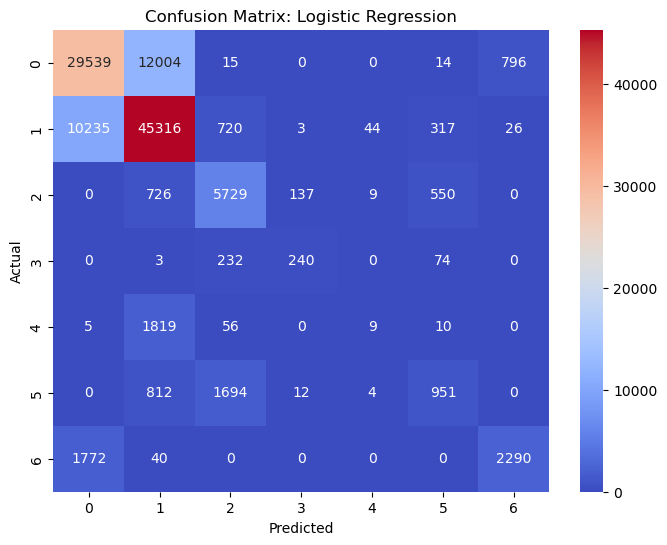

In [8]:
log_reg=LogisticRegression(multi_class="multinomial",max_iter=1000)
log_reg.fit(x_train_scaled,y_train)
y_pred_lg=log_reg.predict(x_test_scaled)
show_results(y_test,y_pred_lg,'Logistic Regression')

Results for Random Forest:

Confusion Matrix:
 [[39889  2376     1     0     6     2    94]
 [ 1300 55120   104     1    54    68    14]
 [    0   122  6866    23     6   134     0]
 [    0     0    58   470     0    21     0]
 [   25   383    20     0  1462     9     0]
 [    5    92   261    19     4  3092     0]
 [  193    28     0     0     0     0  3881]] 

Accuracy: 0.9533

Classification Report:
               precision    recall  f1-score   support

           1       0.96      0.94      0.95     42368
           2       0.95      0.97      0.96     56661
           3       0.94      0.96      0.95      7151
           4       0.92      0.86      0.89       549
           5       0.95      0.77      0.85      1899
           6       0.93      0.89      0.91      3473
           7       0.97      0.95      0.96      4102

    accuracy                           0.95    116203
   macro avg       0.95      0.91      0.92    116203
weighted avg       0.95      0.95      0.95    1162

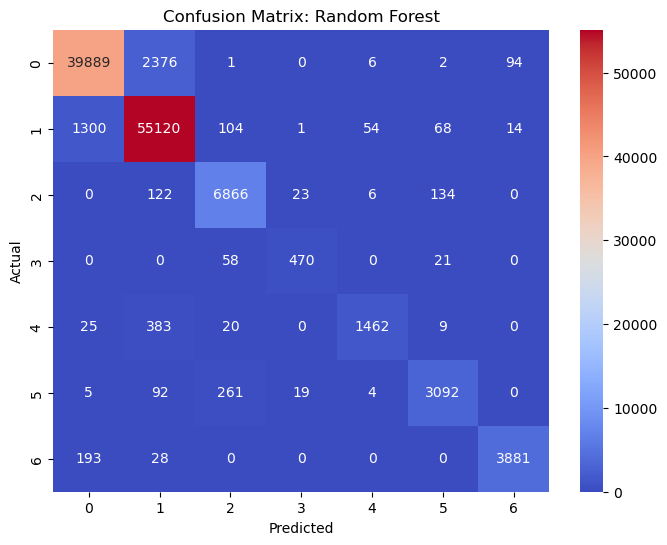

In [9]:
rf=RandomForestClassifier(n_estimators=100,max_depth=None,random_state=42)
rf.fit(x_train,y_train)
y_pred_rf=rf.predict(x_test)
show_results(y_test,y_pred_rf,"Random Forest")

Results for XGB:

Confusion Matrix:
 [[33195  8826     4     0    13     4   326]
 [ 7001 49010   353     3    71   188    35]
 [    0   557  6146    65     0   383     0]
 [    0     0    71   458     0    20     0]
 [   10  1250    39     0   598     2     0]
 [    5   566  1154    28     1  1719     0]
 [  780    21     0     0     0     0  3301]] 

Accuracy: 0.8126

Classification Report:
               precision    recall  f1-score   support

           1       0.81      0.78      0.80     42368
           2       0.81      0.86      0.84     56661
           3       0.79      0.86      0.82      7151
           4       0.83      0.83      0.83       549
           5       0.88      0.31      0.46      1899
           6       0.74      0.49      0.59      3473
           7       0.90      0.80      0.85      4102

    accuracy                           0.81    116203
   macro avg       0.82      0.71      0.74    116203
weighted avg       0.81      0.81      0.81    116203



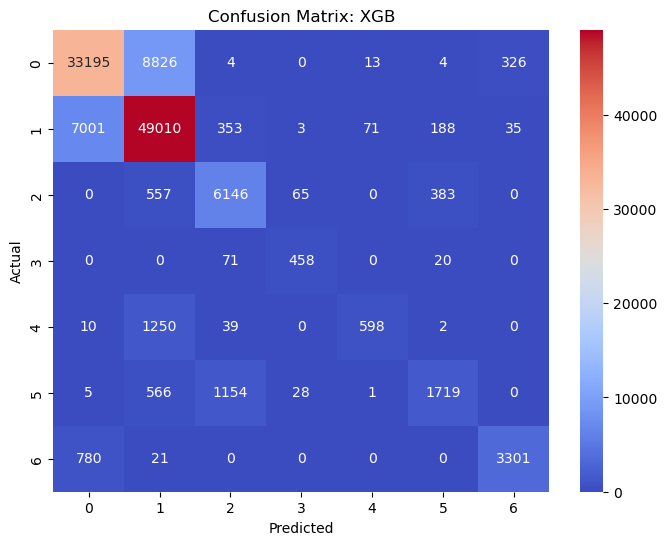

In [10]:
y_train_xgb = y_train - 1
y_test_xgb  = y_test - 1

xgb = XGBClassifier(
    n_estimators=100,       
    max_depth=6,            
    learning_rate=0.1,       
    random_state=42,        
    eval_metric='mlogloss'   
)


xgb.fit(x_train,y_train_xgb)
y_pred_xgb=xgb.predict(x_test)

y_pred_xgb = y_pred_xgb + 1

show_results(y_test,y_pred_xgb,"XGB")